Оценка погрешности выходного сигнала относительно референсного

In [4]:
import numpy as np

ref = np.memmap("sine.pcm", dtype=np.int16, mode='r')
out = np.memmap("output.pcm", dtype=np.int16, mode='r')

Теоретическое исследование фазы в выбранном ее изменении

In [25]:
err = np.zeros(144000)
phase1, phase2 = 0, 0
for j in range (0, 144000):
  phase1 = j * 512 * 837.7 / 8000
  i = j
  phase2 = (i >> 17) * 7027137
  i = i & 131071
  phase2 += (i >> 11) * 109799
  i = i & 2047
  phase2 += (i >> 8) * 13725
  i = i & 255
  phase2 += (i >> 6) * 3431
  i = i & 63
  phase2 += (i >> 3) * 429
  i = i & 7
  phase2 += (i >> 1) * 107
  i = i & 1
  phase2 += i * 54
  err[j] = phase1 - phase2

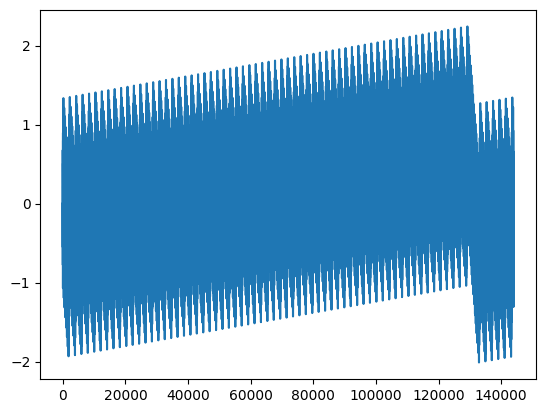

Минимальное значение расхождения фазы:  -2.011199999600649
Максимальное значение расхождения фазы:  2.2416000002995133


In [29]:
import matplotlib.pyplot as plt
y = np.arange(-1, 1);
plt.plot(err)
plt.show()

print('Минимальное значение расхождения фазы: ', err.min())
print('Максимальное значение расхождения фазы: ', err.max())

Вычисление итоговой погрешности генерации

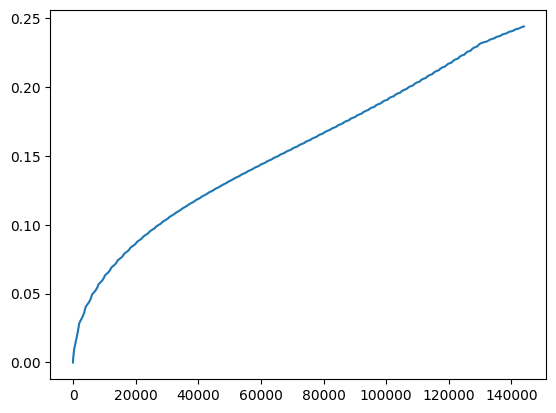

In [31]:
delta = np.zeros(144000)
delta[0] = (ref[0] - out[0]) ** 2
for i in range(1, 144000):
  delta[i] = delta[i - 1] + (ref[i] - out[i]) ** 2
delta /= (144000 ** 2)
delta = np.sqrt(delta)

plt.plot(delta)
plt.show()

Расчет среднего разброса значений генерации

In [38]:
mean = 0
count = 0
for i in range(0, 144000):
  if (ref[i] != 0):
    mean += abs(ref[i] - out[i]) / ref[i]
    count += 1
mean /= count
print(mean, '%')

0.0009942375194248365 %
